In [ ]:
import zipfile
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from scipy import stats

Тесты для месторождения **Spe**

In [ ]:
zip_file = 'Pred_Spe.zip'

extract_folder = 'Pred_Spe'

# Распаковываем zip-файл
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [ ]:
# Загружаем тестую выборку
test_y_spe = np.load('test_y_spe.npy')

In [ ]:
# Функция для вычисления метрик предсказания моделей
def load_and_evaluate(directory, test_y, metric):
    transfer_list = [np.load(f'{directory}/trans_pred_{i+1}.npy') for i in range(10)]
    usually_list = [np.load(f'{directory}/pred_{i+1}.npy') for i in range(10)]

    transfer_metrics = [metric(test_y, transfer_list[i]) for i in range(10)]
    usually_metrics = [metric(test_y, usually_list[i]) for i in range(10)]

    return transfer_metrics, usually_metrics

In [ ]:
transfer_metrics_mae_spe, usually_metrics_mae_spe = load_and_evaluate('Pred_Spe', test_y_spe, mean_absolute_error)
transfer_metrics_rmse_spe, usually_metrics_rmse_spe = load_and_evaluate('Pred_Spe', test_y_spe, root_mean_squared_error)

In [ ]:
# Функция для вычисления статистики и p_value парного т-теста метрик моделей
def t_test(transfer_metrics_mae, usually_metrics_mae, transfer_metrics_rmse, usually_metrics_rmse):
    t_statistic, p_value = stats.ttest_rel(transfer_metrics_mae, usually_metrics_mae)
    print(f"P-value для MAE: {p_value}")
    if p_value < 0.05:
        if np.mean(transfer_metrics_mae) < np.mean(usually_metrics_mae):
            print("Модель трансферного обучения предсказывает точнее")
        else:
            print("Модель без трансферного обучения предсказывает точнее")
    t_statistic, p_value = stats.ttest_rel(transfer_metrics_rmse, usually_metrics_rmse)
    print(f"P-value для RMSE: {p_value}")
    if p_value < 0.05:
        if np.mean(transfer_metrics_rmse) < np.mean(usually_metrics_rmse):
            print("Модель трансферного обучения предсказывает точнее")
        else:
            print("Модель без трансферного обучения предсказывает точнее")

In [ ]:
# Функция для вычисления статистики и p_value критерия Уилкоксона метрик моделей
def wilcoxon(transfer_metrics_mae, usually_metrics_mae, transfer_metrics_rmse, usually_metrics_rmse):
    wilcoxon_result_mae = stats.wilcoxon(transfer_metrics_mae, usually_metrics_mae)
    print(f"P-value для MAE: {wilcoxon_result_mae.pvalue}")
    if wilcoxon_result_mae.pvalue < 0.05:
        if np.median(transfer_metrics_mae) < np.median(usually_metrics_mae):
            print("Модель трансферного обучения предсказывает точнее")
        else:
            print("Модель без трансферного обучения предсказывает точнее")
    wilcoxon_result_rmse = stats.wilcoxon(transfer_metrics_rmse, usually_metrics_rmse)
    print(f"P-value для RMSE: {wilcoxon_result_rmse.pvalue}")
    if wilcoxon_result_rmse.pvalue < 0.05:
        if np.median(transfer_metrics_rmse) < np.median(usually_metrics_rmse):
            print("Модель трансферного обучения предсказывает точнее")
        else:
            print("Модель без трансферного обучения предсказывает точнее")

In [ ]:
t_test(transfer_metrics_mae_spe, usually_metrics_mae_spe, transfer_metrics_rmse_spe, usually_metrics_rmse_spe)

P-value для MAE: 0.00019366740134486241
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 3.689542628066434e-05
Модель трансферного обучения предсказывает точнее


In [ ]:
wilcoxon(transfer_metrics_mae_spe, usually_metrics_mae_spe, transfer_metrics_rmse_spe, usually_metrics_rmse_spe)

P-value для MAE: 0.001953125
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 0.001953125
Модель трансферного обучения предсказывает точнее


In [ ]:
# Функция для построения распределения ошибок моделей в виде box-plot
def box_plot(transfer_metrics_mae, usually_metrics_mae, transfer_metrics_rmse, usually_metrics_rmse):
  data = pd.DataFrame({
    "Values": usually_metrics_mae + transfer_metrics_mae + usually_metrics_rmse + transfer_metrics_rmse,
    "Metric": ["Обычная NMAE"] * len(usually_metrics_mae)
              + ["Трансферная NMAE"] * len(transfer_metrics_mae)
              + ["Обычная NRMSE"] * len(usually_metrics_rmse)
              + ["Трансферная NRMSE"] * len(transfer_metrics_rmse),
    "Type": ["NMAE"] * (len(usually_metrics_mae) + len(transfer_metrics_mae))
            + ["NRMSE"] * (len(usually_metrics_rmse) + len(transfer_metrics_rmse))
  })

  # Строим box plot
  plt.figure(figsize=(10, 5))
  sns.boxplot(x="Metric", y="Values", data=data, hue="Type", palette="Set2")
  plt.title("Comparison of MAE and RMSE Metrics")
  plt.xlabel("Метрика")
  plt.ylabel("Значения")
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend(title="Метрика")
  plt.show()

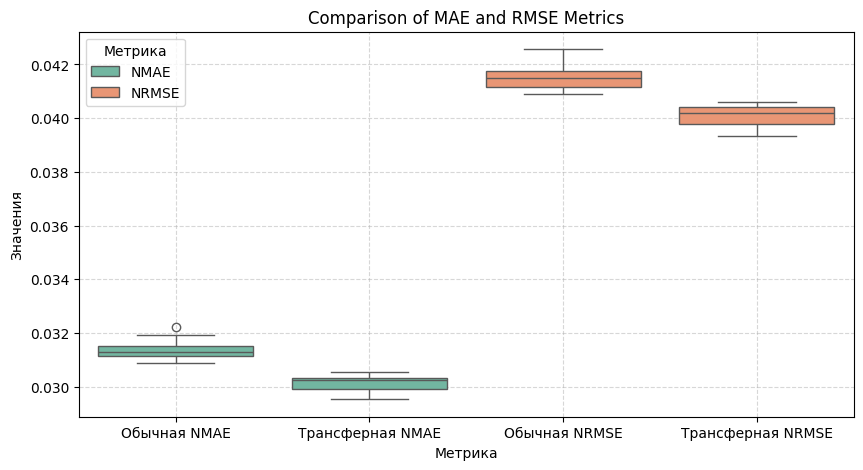

In [ ]:
box_plot(transfer_metrics_mae_spe, usually_metrics_mae_spe, transfer_metrics_rmse_spe, usually_metrics_rmse_spe)

In [ ]:
mean_difference_percent_mae = (np.mean(usually_metrics_mae_spe) - np.mean(transfer_metrics_mae_spe))/ np.mean(transfer_metrics_mae_spe) * 100
mean_difference_percent_rmse = (np.mean(usually_metrics_rmse_spe) - np.mean(transfer_metrics_rmse_spe))/ np.mean(transfer_metrics_rmse_spe) * 100
print(f"Средняя разница MAE: {mean_difference_percent_mae:.2f}%")
print(f"Средняя разница RMSE: {mean_difference_percent_rmse:.2f}%")

Средняя разница MAE: 4.22%
Средняя разница RMSE: 3.65%


Тесты для месторождения **Nopims**

In [ ]:
zip_file = 'Pred_Nopims.zip'

extract_folder = 'Pred_Nopims'

# Распаковываем zip-файл
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [ ]:
# Загружаем тестую выборку
test_y_nopims = np.load('test_y_nopims.npy')

In [ ]:
transfer_metrics_mae_nopims, usually_metrics_mae_nopims = load_and_evaluate('Pred_Nopims', test_y_nopims, mean_absolute_error)
transfer_metrics_rmse_nopims, usually_metrics_rmse_nopims = load_and_evaluate('Pred_Nopims', test_y_nopims, root_mean_squared_error)

In [ ]:
t_test(transfer_metrics_mae_nopims, usually_metrics_mae_nopims, transfer_metrics_rmse_nopims, usually_metrics_rmse_nopims)

P-value для MAE: 0.004814433315499088
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 0.013305491423568565
Модель трансферного обучения предсказывает точнее


In [ ]:
wilcoxon(transfer_metrics_mae_nopims, usually_metrics_mae_nopims, transfer_metrics_rmse_nopims, usually_metrics_rmse_nopims)

P-value для MAE: 0.005859375
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 0.009765625
Модель трансферного обучения предсказывает точнее


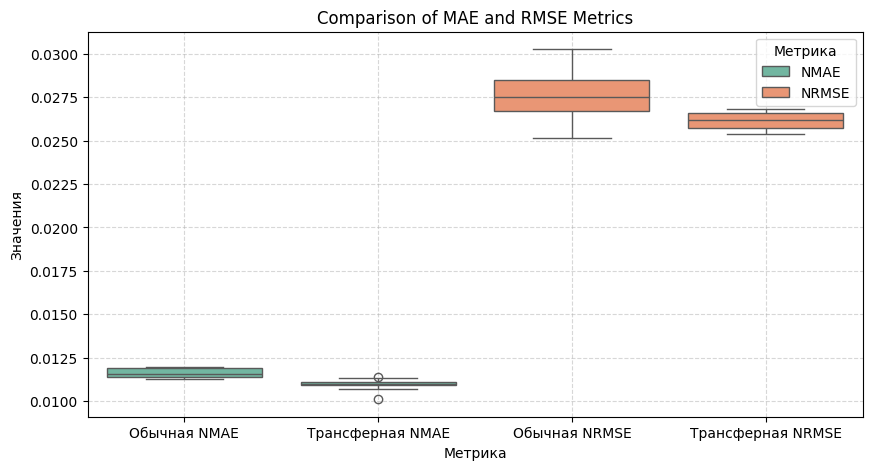

In [ ]:
box_plot(transfer_metrics_mae_nopims, usually_metrics_mae_nopims, transfer_metrics_rmse_nopims, usually_metrics_rmse_nopims)

In [ ]:
mean_difference_percent_mae = (np.mean(usually_metrics_mae_nopims) - np.mean(transfer_metrics_mae_nopims))/ np.mean(transfer_metrics_mae_nopims) * 100
mean_difference_percent_rmse = (np.mean(usually_metrics_rmse_nopims) - np.mean(transfer_metrics_rmse_nopims))/ np.mean(transfer_metrics_rmse_nopims) * 100
print(f"Средняя разница MAE: {mean_difference_percent_mae:.2f}%")
print(f"Средняя разница RMSE: {mean_difference_percent_rmse:.2f}%")

Средняя разница MAE: 6.11%
Средняя разница RMSE: 5.58%


Тесты для месторождения **Force**

In [ ]:
zip_file = 'Pred_Force.zip'

extract_folder = 'Pred_Force'

# Распаковываем zip-файл
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [ ]:
# Загружаем тестую выборку
test_y_force = np.load('test_y_force.npy')

In [ ]:
transfer_metrics_mae_force, usually_metrics_mae_force = load_and_evaluate('Pred_Force', test_y_force, mean_absolute_error)
transfer_metrics_rmse_force, usually_metrics_rmse_force = load_and_evaluate('Pred_Force', test_y_force, root_mean_squared_error)

In [ ]:
t_test(transfer_metrics_mae_force, usually_metrics_mae_force, transfer_metrics_rmse_force, usually_metrics_rmse_force)

P-value для MAE: 0.0006417022755887344
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 8.21510279097795e-05
Модель трансферного обучения предсказывает точнее


In [ ]:
wilcoxon(transfer_metrics_mae_force, usually_metrics_mae_force, transfer_metrics_rmse_force, usually_metrics_rmse_force)

P-value для MAE: 0.00390625
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 0.001953125
Модель трансферного обучения предсказывает точнее


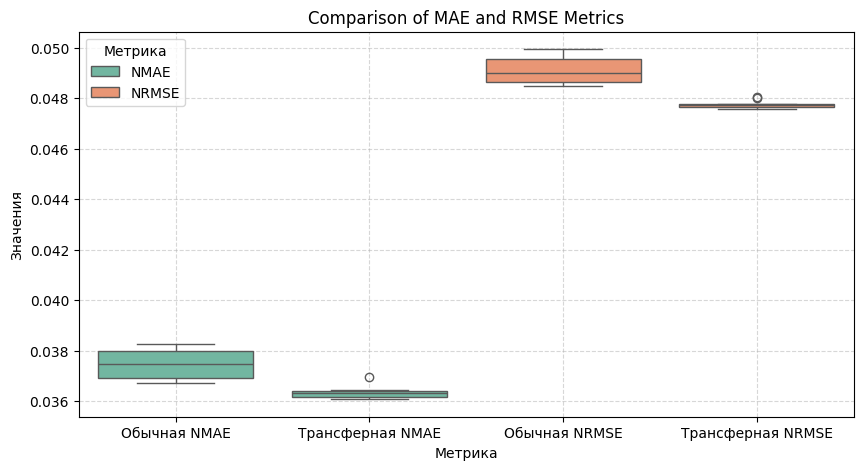

In [ ]:
box_plot(transfer_metrics_mae_force, usually_metrics_mae_force, transfer_metrics_rmse_force, usually_metrics_rmse_force)

In [ ]:
mean_difference_percent_mae = (np.mean(usually_metrics_mae_force) - np.mean(transfer_metrics_mae_force))/ np.mean(transfer_metrics_mae_force) * 100
mean_difference_percent_rmse = (np.mean(usually_metrics_rmse_force) - np.mean(transfer_metrics_rmse_force))/ np.mean(transfer_metrics_rmse_force) * 100
print(f"Средняя разница MAE: {mean_difference_percent_mae:.2f}%")
print(f"Средняя разница RMSE: {mean_difference_percent_rmse:.2f}%")

Средняя разница MAE: 3.16%
Средняя разница RMSE: 2.82%


Тесты для месторождения **Kansas**

In [ ]:
zip_file = 'Pred_Kansas.zip'

extract_folder = 'Pred_Kansas'

# Распаковываем zip-файл
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [ ]:
# Загружаем тестую выборку
test_y_kansas = np.load('test_y_kansas.npy')

In [ ]:
transfer_metrics_mae_kansas, usually_metrics_mae_kansas = load_and_evaluate('Pred_Kansas', test_y_kansas, mean_absolute_error)
transfer_metrics_rmse_kansas, usually_metrics_rmse_kansas = load_and_evaluate('Pred_Kansas', test_y_kansas, root_mean_squared_error)

In [ ]:
t_test(transfer_metrics_mae_kansas, usually_metrics_mae_kansas, transfer_metrics_rmse_kansas, usually_metrics_rmse_kansas)

P-value для MAE: 0.014469818419685613
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 0.00018247905431885907
Модель трансферного обучения предсказывает точнее


In [ ]:
wilcoxon(transfer_metrics_mae_kansas, usually_metrics_mae_kansas, transfer_metrics_rmse_kansas, usually_metrics_rmse_kansas)

P-value для MAE: 0.01953125
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 0.00390625
Модель трансферного обучения предсказывает точнее


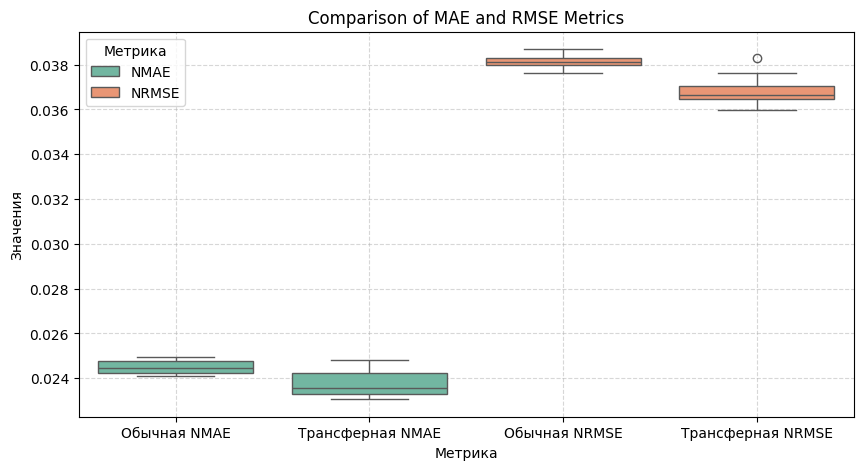

In [ ]:
box_plot(transfer_metrics_mae_kansas, usually_metrics_mae_kansas, transfer_metrics_rmse_kansas, usually_metrics_rmse_kansas)

In [ ]:
mean_difference_percent_mae = (np.mean(usually_metrics_mae_kansas) - np.mean(transfer_metrics_mae_kansas))/ np.mean(transfer_metrics_mae_kansas) * 100
mean_difference_percent_rmse = (np.mean(usually_metrics_rmse_kansas) - np.mean(transfer_metrics_rmse_kansas))/ np.mean(transfer_metrics_rmse_kansas) * 100
print(f"Средняя разница MAE: {mean_difference_percent_mae:.2f}%")
print(f"Средняя разница RMSE: {mean_difference_percent_rmse:.2f}%")

Средняя разница MAE: 2.94%
Средняя разница RMSE: 3.58%


Тесты для месторождения **Taranaki**

In [ ]:
zip_file = 'Pred_Taranaki.zip'

extract_folder = 'Pred_Taranaki'

# Распаковываем zip-файл
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [ ]:
# Загружаем тестую выборку
test_y_taranaki = np.load('test_y_taranaki.npy')

In [ ]:
transfer_metrics_mae_taranaki, usually_metrics_mae_taranaki = load_and_evaluate('Pred_Taranaki', test_y_taranaki, mean_absolute_error)
transfer_metrics_rmse_taranaki, usually_metrics_rmse_taranaki = load_and_evaluate('Pred_Taranaki', test_y_taranaki, root_mean_squared_error)

In [ ]:
t_test(transfer_metrics_mae_taranaki, usually_metrics_mae_taranaki, transfer_metrics_rmse_taranaki, usually_metrics_rmse_taranaki)

P-value для MAE: 1.384856313253204e-05
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 1.324775200338143e-06
Модель трансферного обучения предсказывает точнее


In [ ]:
wilcoxon(transfer_metrics_mae_taranaki, usually_metrics_mae_taranaki, transfer_metrics_rmse_taranaki, usually_metrics_rmse_taranaki)

P-value для MAE: 0.001953125
Модель трансферного обучения предсказывает точнее
P-value для RMSE: 0.001953125
Модель трансферного обучения предсказывает точнее


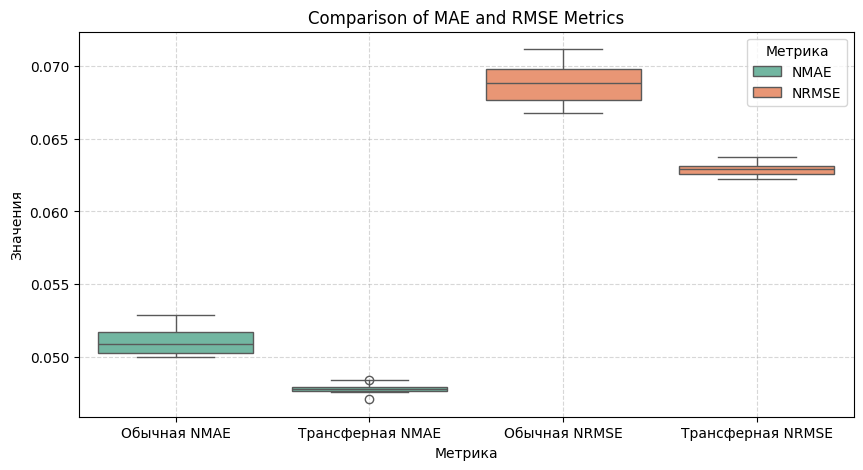

In [ ]:
box_plot(transfer_metrics_mae_taranaki, usually_metrics_mae_taranaki, transfer_metrics_rmse_taranaki, usually_metrics_rmse_taranaki)

In [ ]:
mean_difference_percent_mae = (np.mean(usually_metrics_mae_taranaki) - np.mean(transfer_metrics_mae_taranaki))/ np.mean(transfer_metrics_mae_taranaki) * 100
mean_difference_percent_rmse = (np.mean(usually_metrics_rmse_taranaki) - np.mean(transfer_metrics_rmse_taranaki))/ np.mean(transfer_metrics_rmse_taranaki) * 100
print(f"Средняя разница MAE: {mean_difference_percent_mae:.2f}%")
print(f"Средняя разница RMSE: {mean_difference_percent_rmse:.2f}%")

Средняя разница MAE: 6.80%
Средняя разница RMSE: 9.46%
